<a href="https://colab.research.google.com/github/OKcomputer626/Data-Day-2025-CSULB/blob/main/Data_Day_2025_CSULB_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚩 Setup

*Andres' Breakout Session with Gerry Cruz and Robbie Born*

## 🎵 Melodies & Metrics: Decoding Your Favorite Musician's Data 🎤

Welcome to this hands-on session where we'll explore how **data science meets music!**

In this project, we'll analyze the lyrics of a popular artist using data pulled from **Genius**, one of the world's largest platforms for song lyrics, annotations, and music knowledge. Genius is home to a global community of contributors who explain, annotate, and discuss the meaning behind your favorite songs.

Today, we’ll extract lyrics, clean them, perform some text mining, and visualize insights that reveal how your favorite artist writes their songs — all using **R inside Google Colab**! 🎧📊

---

### 🚀 **Learning Objectives**

By the end of this session, you'll be able to:
- 🔍 Load and explore a lyrics dataset using `jsonlite` and `tidyverse`.
- 🧹 Clean and preprocess raw text data (remove brackets, line breaks, etc.).
- 🧠 Apply basic **natural language processing (NLP)** techniques with `tidytext`.
- 📊 Visualize frequent words and sentiment patterns with `ggplot2`.
- 🎨 Create data-driven visuals enhanced with custom fonts and images using `showtext` and `ggimage`.

---

### 🗓️ Session Outline

1. **Introduction to the Dataset** – Explore the Genius lyrics dataset and understand its JSON structure.
2. **Data Cleaning & Preprocessing** – Remove unwanted text (e.g., [Chorus], [Verse]) and tokenize lyrics into individual words.
3. **Plot 1: Word Frequency Analysis** – Visualize the top 10 most frequently used words from the artist’s top 50 songs.
4. **Sentiment Analysis** – Analyze the emotional tone by scoring positive and negative words across songs using the Bing lexicon.
5. **Plot 2: Sentiment Map of Songs** – Create a sentiment map to visualize where each song falls on the positive-negative spectrum.
6. **Wrap-up & Discussion** – Discuss key takeaways and explore how this workflow applies to other types of data.



In [ ]:
# 🚩 Step 1: Install & Load Libraries ----
# Let's make sure we have all the libraries we need for this project.
# We'll use pacman::p_load() to efficiently load (and install if missing) multiple packages.

system("apt-get install -y libmmagick++-dev", intern = TRUE)

if (!require("pacman")) install.packages("pacman")

pacman::p_load(
  tidyverse,   # Collection of core R packages (dplyr, ggplot2, readr, etc.)
  showtext,    # Load and use custom fonts in ggplot2
  tidytext,    # Text mining and natural language processing (NLP) for tidy data
  janitor,     # Clean and format messy data (e.g., clean column names)
  jsonlite,    # Import JSON files into R as data frames or lists
  ggimage,     # Add images/icons to ggplot2 charts
  ggtext,      # Advanced text formatting (e.g., markdown/HTML in ggplot2 plots)
  glue,        # String interpolation / templating (glue variables into strings)
  here         # Makes file paths relative to project root (avoids hardcoding paths)
)


In [ ]:
# 🚩 Step 2: Load Google Fonts ----

# Add two Google Fonts using showtext's font_add_google()
font_add_google(name = "Open Sans", family = "Sans")          # Clean sans-serif font for subtitles and annotations
font_add_google(name = "Merriweather", family = "Merriweather") # Serif font for titles and headings

# Assign font families to variables for later use in ggplot
font1 <- "Sans"
font2 <- "Merriweather"

📝 **Note:** You can load any Google Font you like!
Visit [Google Fonts](https://fonts.google.com/) to browse available fonts.
Just replace the font name inside font_add_google() with your selection.

In [ ]:
# 🚩 Step 3: Load a Local Font from GitHub ----
# Add local font
# URL of the raw .otf file from GitHub
url <- "https://raw.githubusercontent.com/OKcomputer626/Data-Day-2025-CSULB/main/fonts/otfs/Font%20Awesome%206%20Brands-Regular-400.otf"

# Download the font temporarily
destfile <- tempfile(fileext = ".otf")
download.file(url, destfile, mode = "wb")

# Register the downloaded font
font_add("Font Awesome 6 Brands", destfile)

# Enable showtext rendering for plots
showtext_auto()

# Set DPI for high-resolution text rendering
showtext_opts(dpi = 300)

📝 **TASK:** Choose an artist's lyrics JSON file from the GitHub repository.

Example repository URL:
https://github.com/OKcomputer626/Data-Day-2025-CSULB/tree/main/data 🔽

In [ ]:
# 🚩 Step 4: Load Lyrics Data from GitHub ----
# 👇 Replace the URL below with your selected artist's JSON file (e.g., Drake, TaylorSwift, etc.)
json_url <- "https://raw.githubusercontent.com/OKcomputer626/Data-Day-2025-CSULB/main/data/Lyrics_BillieEilish.json"

# Load the lyrics dataset directly from the URL
artist_data <- fromJSON(json_url)

In [ ]:
# 🚩 Step 5: Prepare and Clean Lyrics ----
songs_df <- artist_data$songs %>%
  clean_names() %>%
  as_tibble() %>%
  select(title, lyrics) %>%
  mutate(
    lyrics_clean = str_remove_all(lyrics, "\\[.*?\\]"),
    lyrics_clean = str_replace_all(lyrics_clean, "\\n", " "),
    lyrics_clean = str_squish(lyrics_clean)
  ) %>%
  select(-lyrics)

# Tokenize lyrics and remove stop words
lyrics_words <- songs_df %>%
  unnest_tokens(word, lyrics_clean) %>%
  anti_join(stop_words)

📝 **TASK:** Write a short paragraph summarizing your artist and add branding for social media. 🔽

💡 Tip: For selecting colors (e.g., icon_color, text color, fill color), check out these helpful resources:
- [Coolors Palette Generator](https://coolors.co/)
- [Image Color Picker](https://imagecolorpicker.com/)

🎨 It's important to select colors that complement each other and match the tone or branding of your visualization!

In [ ]:
# 🚩 Step 6: Create a Custom Caption ----

# Generate captions
# Create your own summary text
st <- "The 10 most frequent words from Billie Eilish’s lyrics, based on her top 50 songs on Genius. The 23-year-old
Highland Park native has been shaping music since 2015, earning nine Grammy Awards, two Academy Awards, two Golden Globes,
and multiple MTV VMAs, while reaching over 103 million Spotify listeners."

# Generate a social media caption with custom colors and font styling
source("https://raw.githubusercontent.com/OKcomputer626/Data-Day-2025-CSULB/main/utils/social_caption.R")
social <- social_caption(font_family = font2, icon_color = "#0ff40f", twitter = "", linkedin = "")

# Combine everything into a caption
cap <- paste0(
  st,
  "<br>#DataDay2025CSULB | **Source**: Genius<br><br>",
  social
)

In [ ]:
# 🚩 Step 7: Plot 1 – Top 10 Most Frequent Words ----

# Get the top 10 words
top_10 <- lyrics_words %>%
  count(word, sort = TRUE) %>%
  slice(1:10)

# Create horizontal bar plot of the top 10 most frequent words
top_10 %>%
  ggplot(aes(x = fct_reorder(word, n), y = n)) +
  geom_bar(stat = "identity", fill = "#0ff40f", width = 0.8) +
  geom_text(
    aes(y = 2.5, label = n), hjust = 0,
    family = font2, size = 3, fontface = "bold", color = "#000000"
  ) +
  geom_image(
    data = slice_head(top_10, n = 1),
    aes(x = 7, y = 85, image = "https://raw.githubusercontent.com/OKcomputer626/Data-Day-2025-CSULB/main/pics/billie%20eilish%20logo.png"),
    size = 0.6
  ) +
  coord_flip() +
  labs(x = NULL, y = NULL, tag = cap) +
  scale_y_continuous(expand = expansion(0, 0)) +
  theme_minimal(base_size = 11, base_family = font2) +
  theme(
    panel.grid = element_blank(),
    axis.text.x = element_blank(),
    axis.text.y = element_text(hjust = 0, color = "#000000"),
    plot.margin = margin(5, 10, 5, 10),
    plot.background = element_rect(fill = "#ffffff", colour = "#ffffff"),
    plot.tag.position = c(0.97, 0.36),
    plot.tag = element_textbox_simple(
      color = "#000000", hjust = 1, halign = 1,
      lineheight = 1.5, family = font2, size = 7, maxwidth = 0.7
    )
  )

# Save your plot!
ggsave("Billie Eilish top 10 words.png", width = 7, height = 5)

Joining with `by = join_by(word)`
Joining with `by = join_by(word)`


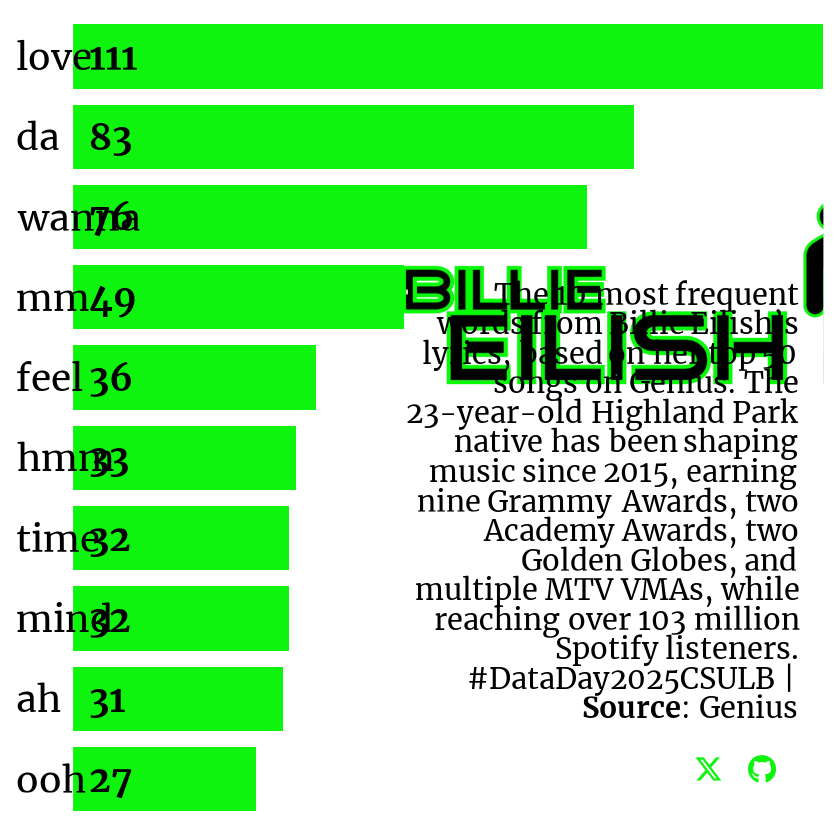

In [ ]:
# 🚩 Step 8: Sentiment Analysis using the Bing Lexicon ----

# Join lyrics with Bing sentiment lexicon and count sentiment words per song
sentiments_df <- lyrics_words %>%
  inner_join(get_sentiments("bing")) %>%
  count(title, sentiment) %>%
  spread(sentiment, n, fill = 0) %>%
  mutate(sentiment = positive - negative)

# Organize songs by sentiment
df <- sentiments_df %>%
  mutate(test = if_else(sentiment < 0, "negative", "positive")) %>%
  arrange(test, sentiment) %>%
  group_by(test) %>%
  mutate(
    row_num = row_number(),
    row_num = if_else(test == "negative", rev(row_num), row_num)
  ) %>%
  ungroup() %>%
  mutate(test = factor(test, levels = c("positive", "negative")))

# Dont worry this will look good! 🔼

Customize the social media caption hex color using Coolors or ImageColorPicker! 🔽

In [ ]:
# 🚩 Step 9: Create a Sentiment Plot Caption ----

# Generate a social media caption with custom colors and font styling
social <- social_caption(font_family = font1, bg_color = "#eed68e")

# Combine everything into a final caption block
cap <- paste0(
  "#DataDay2025CSULB | **Source**: Genius | **Graphic**: ", social
)

In [ ]:
# 🚩 Step 10: Plot 2 – Sentiment Map of Songs ----

# Plot song sentiment
df %>%
  ggplot() +
  geom_text(
    aes(x = test, y = if_else(test == "positive", row_num, (-1 * row_num)), label = title),
    color = "#000000", size = 3.5, family = font2
  ) +
  geom_hline(yintercept = 0, color = "#000000") +
  annotate("text", x = 1, y = -15, label = "BILLIE EILISH", family = font2, fontface = "bold", size = 11.5, color = "#000000", hjust = 0.5) +
  annotate("text", x = 1, y = -19, label = "Sentiment analysis of the 50 most popular songs from Genius,\narranged from the most positive (top left)\nto the most negative (bottom right)", family = font1, size = 2.7, color = "#000000", hjust = 0.5) +
  annotate("text", x = 1, y = -1, label = "Positive", family = font1, size = 4, color = "#000000", fontface = "bold", hjust = 0.5) +
  annotate("text", x = 2, y = 1, label = "Negative", family = font1, size = 4, color = "#000000", fontface = "bold", hjust = 0.5) +
  geom_image(data = slice_head(df, n = 1), aes(x = 1, y = -33, image = "https://raw.githubusercontent.com/OKcomputer626/Data-Day-2025-CSULB/main/pics/Billie%20Eilish.png"), size = 0.3, hjust = 0.5) +
  labs(caption = cap) +
  coord_cartesian(clip = "off") +
  theme_void() +
  theme(
    plot.caption.position = "plot",
    plot.caption = element_markdown(family = font1, hjust = 0.5, size = 6),
    plot.margin = margin(0.25, 0.5, 0.5, 0.5, "cm"),
    plot.background = element_rect(color = NA, fill = "#eed68e")
  )

# Save your plot!
ggsave("Billie Eilish Positve and Negative songs.png", width = 6, height = 9)

ERROR while rich displaying an object: Error in `geom_image()`:
! Problem while converting geom to grob.
ℹ Error occurred in the 7th layer.
Caused by error:
! R: unable to open image `pics/Billie Eilish.png': No such file or directory @ error/blob.c/OpenBlob/2924

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::m

ERROR: [1m[33mError[39m in `geom_image()`:[22m
[1m[22m[33m![39m Problem while converting geom to grob.
[36mℹ[39m Error occurred in the 7th layer.
[1mCaused by error:[22m
[33m![39m R: unable to open image `pics/Billie Eilish.png': No such file or directory @ error/blob.c/OpenBlob/2924


ERROR: Error in file(con, "rb"): cannot open the connection


plot without title

# 🎉 That’s it!

✅ You learned how to:
- Clean and preprocess song lyrics using R
- Perform word frequency and sentiment analysis
- Build two insightful plots with personalized styling and annotations

---

### 💬 Q&A + Open Discussion

❓ Have any questions about:
- The techniques we used today?
- How you could apply this workflow to other datasets?
- Customizing visualizations further with `ggplot2` or other tools?

Let’s discuss! 👂🔥

---

### 📚 Helpful Resources

**General R & Visualization**  
- [Tidyverse](https://www.tidyverse.org/)  
- [ggplot2 Reference](https://ggplot2.tidyverse.org/)  
- [R Graph Gallery](https://r-graph-gallery.com/)  
- [R Weekly](https://rweekly.org/)  

**GitHub for Inspiration**  
- [nrennie](https://github.com/nrennie)  
- [gkaramanis](https://github.com/gkaramanis)  
- [bydata](https://github.com/bydata)  
- [BlakeRMills](https://github.com/BlakeRMills)  

**YouTube Learning**  
- [R for the Rest of Us](https://www.youtube.com/@rfortherestofus)  
- [Riffomonas Project](https://www.youtube.com/@Riffomonas)  
- [Learning Bayesian Statistics](https://www.youtube.com/@learningbayesianstatistics)  
- [Very Normal](https://www.youtube.com/@very-normal)

---

Thanks for joining the session! 🙌  
*#DataDay2025CSULB | #RStats*